<a href="https://colab.research.google.com/github/piru24/DL_Ass_Sample/blob/main/DS_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Keep top 10,000 words (rare words dropped)
NUM_WORDS = 10000
MAXLEN = 300  # sequence length (trim/pad reviews)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

# Pad/truncate to uniform length
X_train = pad_sequences(X_train, maxlen=MAXLEN)
X_test  = pad_sequences(X_test,  maxlen=MAXLEN)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 300) (25000,)
Test shape: (25000, 300) (25000,)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(NUM_WORDS, 128, input_length=MAXLEN),  # word embeddings
    Bidirectional(LSTM(64)),                         # Bi-LSTM layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')                   # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(patience=3, restore_best_weights=True)
mc = ModelCheckpoint("best_lstm.h5", save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    callbacks=[es, mc]
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.6417 - loss: 0.6084

157/157 ━━━━━━━━━━━━━━━━━━━━ 154s 958ms/step - accuracy: 0.6423 - loss: 0.6077 - val_accuracy: 0.8310 - val_loss: 0.3820
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - accuracy: 0.8789 - loss: 0.3150

157/157 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8789 - loss: 0.3148 - val_accuracy: 0.8752 - val_loss: 0.3488
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 153s 978ms/step - accuracy: 0.9284 - loss: 0.2047 - val_accuracy: 0.8766 - val_loss: 0.3635
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9339 - loss: 0.1832 - val_accuracy: 0.8590 - val_loss: 0.3685
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9578 - loss: 0.1237 - val_accuracy: 0.8560 - val_loss: 0.3600


782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.8626 - loss: 0.3800
Test Accuracy: 0.8626
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



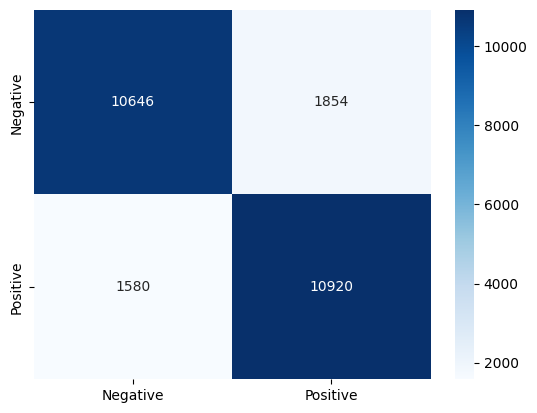

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {acc:.4f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.show()
